# Imágenes y Matrices

In [1]:
import cv2
import numpy as np
%matplotlib inline
import cuia

OpenCV utiliza la biblioteca [NumPy](https://numpy.org) para el almacenamiento y manipulación de imágenes en forma de matrices multidimensionales [ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html)

In [2]:
baboon = cv2.imread("media/baboon.jpg")

Las imágenes son almacenadas en matrices tridimensionales de enteros de 8 bits sin signo [uint8](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.uint8). En estas matrices la primera dimensión representa las filas de la imagen, la segunda dimensión las columnas y la tercera las bandas. 

**ATENCIÓN**: Acostumbramos a referirnos a la posición de un pixel en pantalla indicando primero la columna (x) y después la fila (y), es decir, usamos unas coordenadas (x,y). Sin embargo, en OpenCV al acceder a la matriz de una imagen debemos indicar primero la fila (y) y después la columna (x).

Una matriz ofrece una propiedad [shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html) que devuelve una tupla con el tamaño de cada una de las dimensiones de la imagen.

In [3]:
print(baboon.shape)

(512, 512, 3)


Podemos comprobar que la imagen baboon tiene 512 filas, 512 columnas y 3 bandas. La cantidad de bandas de una imagen dependen del [espacio de color](https://es.wikipedia.org/wiki/Espacio_de_color) con el que está codificada la imagen. Algunos ejemplos de espacios de color empleados en OpenCV son:
* Código: GRAY
    * Número de bandas: 1
    * Espacio de color: Escala de grises
    * Banda 0 [0 - 255] Representa la luminosidad del pixel en unna imagen en escala de grises
* Código: BGR
    * Número de bandas: 3
    * Espacio de color [RGB](https://es.wikipedia.org/wiki/RGB) almacenado en el orden B-G-R
    * Banda 0 (B) [0 - 255] Representa la intensidad del color azul
    * Banda 1 (G) [0 - 255] Representa la intensidad del color verde
    * Banda 2 (R) [0 - 255] Representa la intensidad del color rojo
* Código: RGB
    * Número de bandas: 3
    * Espacio de color [RGB](https://es.wikipedia.org/wiki/RGB) almacenado en el orden R-G-B
    * Banda 0 (R) [0 - 255] Representa la intensidad del color rojo
    * Banda 1 (G) [0 - 255] Representa la intensidad del color verde
    * Banda 2 (B) [0 - 255] Representa la intensidad del color azul
* Código: HSV
    * Número de bandas: 3
    * Espacio de color [HSV](https://es.wikipedia.org/wiki/Modelo_de_color_HSV)
    * Banda 0 (H) [0 - 180] Representa el tono (H)
    * Banda 1 (S) [0 - 255] Representa la saturación (S)
    * Banda 2 (V) [0 - 255] Representa el valor (V)
* Código: BGRA
    * Número de bandas: 4
    * Espacio de color [RGB](https://es.wikipedia.org/wiki/RGB) con banda alfa representanndo la opacidad de los píxeles almacenado en el orden B-G-R-A
    * Banda 0 (B) [0 - 255] Representa la intensidad del color azul
    * Banda 1 (G) [0 - 255] Representa la intensidad del color verde
    * Banda 2 (R) [0 - 255] Representa la intensidad del color rojo
    * Banda 3 (A) [0 - 255] Representa la opacidad del pixel (0=Transparencia total, 255=Opacidad total)

OpenCV por defecto usa el espacio de color RGB pero con el orden **BGR** (Esto es debido a que cuando se creó OpenCV no estaba ampliamente aceptado el orden RGB sino que más bien era BGR el ordenamiento más popular). OpenCV ofrece la posibilidad de convertir el espacio de color de una imagen entre RGB, BGR y otros muchos espacios de color adicionales mediante la función [cvtColor](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) La llamada a cvtColor necesita un argumento que indica el tipo de conversión, especificando el espacio de color de la imagen original y el espacio de color destino. Por ejemplo, para convertir al espacio de color HSV la imagen baboon que está en BGR, el código de conversión es cv2.COLOR_BGR2HSV (OpenCV soporta muchos [códigos de conversión](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0) distintos)

In [4]:
baboon_hsv = cv2.cvtColor(baboon, cv2.COLOR_BGR2HSV)

La función [imread(filename[,flags])](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#gab32ee19e22660912565f8140d0f675a8) lee de disco una imagen, la interpreta en función de su contenido sin importar la extensión del fichero y la almacena en una matriz de NumPy.
Si no se indica ninguna [flag](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80), por defecto las imágenes en color las convierte al espacio de color BGR. En el caso de las imágenes con canal alfa, si queremos que se coonserve la información del canal alfa debemos leer la imagen con el parámetro cv2.IMREAD_UNCHANGED.

Comprobemos el efecto que tiene leer una imagen con canal alfa con la conversión a BGR por defecto y la mostraremos mediante Matplotlib usando la función **plot** definida en cuia.py.

(120, 117, 3)


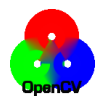

In [5]:
opencv = cv2.imread("media/opencv.png")
print(opencv.shape)
cuia.plot(opencv)

Ahora comprobaremos el efecto de hacer la lectura usando cv2.IMREAD_UNCHANGED

(120, 117, 4)


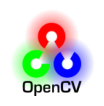

In [6]:
opencv = cv2.imread("media/opencv.png", cv2.IMREAD_UNCHANGED)
print(opencv.shape)
cuia.plot(opencv)

La función [**imshow(	winname, mat	)**](https://docs.opencv.org/4.x/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563), si recibe una matriz de una sola banda la interpreta como una imagen en escala de grises, si recibe 3 bandas la interpreta como una imagen BGR y si recibe 4 bandas la interpreta como una imagen BGRA pero ignorando el canal alfa. Por ese motivo, una imagen con canal alfa no es mostrada por imshow como esperábamos. Usaremos imshow dentro de la función **popup** que definimos en cuia.py.

In [7]:
cuia.popup("OPENCV",opencv)

libGL error: glx: failed to create dri3 screen
libGL error: failed to load driver: nouveau


Numpy, al igual que Python, ofrece la posibilidad de acceder y manipular parted de una matriz mediante [slicing](https://numpy.org/doc/1.21/reference/arrays.indexing.html). Esto no sofrece la posibilidad de realizar mediante una sola orden operaciones que en otros lenguajes requieren varios bucles anidados.

Por ejemplo, si queremos tomar la imagen *baboon* y poner a cero la componente roja (banda 2 del modelo BGR) de todos los píxeles que se encuentren entre las filas 60 y 200 y entre las columnas 250 y 450...

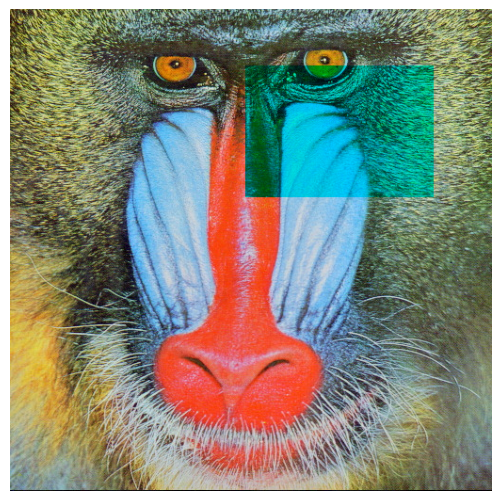

In [15]:
copia = baboon.copy() #Un array de NumPy ofrece el método copy para hacer una copia (y así no modificamos el original)
copia[60:200, 250:450, 2] = 0
cuia.plot(copia)

In [ ]:
Superponer, alfablending

In [ ]:
split merge ndim, ejemplos de imágenes gris color y rgba